# Examples on Information Processinig Capacity visualizations
A notebook for demonstrating the IPC tools in this repository, demonstrated for a random ESN network.

## Imports
and helper functions


In [15]:
from mg_experiment import params_start_evolution
import populations
import numpy as np
from simulator import NetworkSimulator
import Capacities.capacities as CAP
import matplotlib.pyplot as plt
import seaborn as sns
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", font_scale=2.9, palette='deep', context='paper', rc=custom_params)

def cap2vec(capacities,maxdel=1000,maxdeg=10):
    vec = np.zeros((maxdel,maxdeg))
    for idx in range(len(capacities)):
        delay=capacities[idx]['delay']
        degree=capacities[idx]['degree']
        if (delay<=maxdel) and (degree<=maxdeg):
            vec[delay-1,degree-1]+=capacities[idx]['score']
    return vec

def cap2mat(capacities,maxdel=1000,maxdeg=10,maxwin=10):
    vec = np.zeros((maxdel,maxwin,maxdeg))
    for idx in range(len(capacities)):
        delay=capacities[idx]['delay']
        degree=capacities[idx]['degree']
        win=capacities[idx]['window']
        if (delay<=maxdel) and (degree<=maxdeg) and (win<=maxwin):
            vec[delay-1, win-1, degree-1]+=capacities[idx]['score']
    return vec

## Generate Network
First we generate a random ESN

In [2]:
N = 300
k = 1
x_lim = [-1, 1]
y_lim = [-1, 1]
net_params = params_start_evolution(N, dt=1, k=k, x_lim=x_lim, y_lim=y_lim)
start_net = populations.GMMPopulation(**net_params)

Next, some random i.i.d. input is given and reservoir states are recorded. Make sure to use valid input distribution. For Legendre Polynomial basis functions, uniform input between -1 and 1

In [10]:
sim = NetworkSimulator(start_net)
warmup = 100
n_samples = 10000
data_in = np.random.uniform(-1, 1, (n_samples + warmup,))
net_states = sim.get_network_data(data_in)
print(net_states.shape)
data_in = data_in[warmup:]
net_states = net_states[:, warmup:]

(299, 10100)


## Compute IPC
We compute an IPC landscape based on reservoir activity and corresponding inputs

In [30]:
# Define IPC search space
max_lag = 40
max_degree = 3
params = {
    'mindel': 1,
    'mindeg': 1,
    'maxdel': max_lag,
    'maxdeg': max_degree,
    'minvars': 1,
    'maxvars': 3,
    'minwindow': 0,
    'maxwindow': 30,
    'm_delay': False,
    'm_degrees': False,
    'm_window': False,
    'm_windowpos': False,
    'm_variables': False
}

Citer=CAP.capacity_iterator(**params)#, verbose = 1)
totalcap, allcaps, numcaps, nodes = Citer.collect(data_in, net_states.T)

test
Estimated rank of state covariance matrix =  299
Total score for degree  1  =  16.45266350740987 (cumulative total =  16.45266350740987 )
Total score for degree  2  =  83.24521957247612 (cumulative total =  99.69788307988598 )
Total score for degree  3  =  139.11704162287594 (cumulative total =  238.81492470276174 )
Total capacity=238.815 (79.87 percent)


## Basic plot as function of lag
IPC for each degree plotted only as a function of lag, disregarding window size and number of variables.

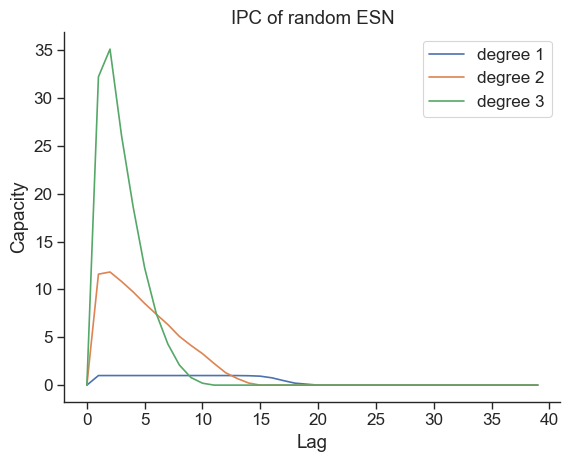

In [32]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", font_scale=1.4, palette='deep', context='paper', rc=custom_params)
V = cap2vec(allcaps, maxdel = max_lag, maxdeg = max_degree)
plt.figure()
plt.plot(V)
plt.title('IPC of random ESN')
plt.legend(['degree ' + str(i+1) for i in range(max_degree)])
plt.ylabel('Capacity')
plt.xlabel('Lag')
plt.savefig('figs_output/example_IPC.pdf')

## Surface plots